## K-최근접 이웃의 한계  

In [1]:
import numpy as np  

In [3]:
# 데이터 준비하기
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # Feature
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # Target

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Train/Test 나누기
train_input,test_input,train_target,test_target=train_test_split(
    perch_length,perch_weight,random_state=42
)

In [6]:
# input 데이터를 2차원 배열로 바꾸기
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [7]:
# k=3인 KNN 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.n_neighbors=3

knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
# length=50인 농어의 무게 예측하기
knr.predict([[50]])

array([1033.33333333])

In [9]:
# 최근접 이웃 확인하기
knr.kneighbors([[50]])

(array([[6., 7., 7.]]), array([[34,  8, 14]]))

In [10]:
import matplotlib.pyplot as plt

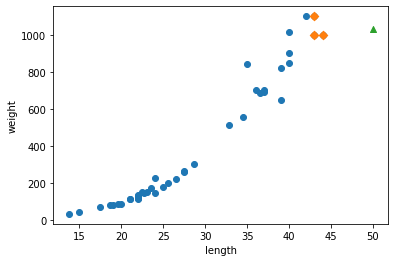

In [12]:
distances,indexes=knr.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D') # 이웃샘플
plt.scatter(50,1033,marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [14]:
print(np.mean(train_target[indexes]))
print(knr.predict([[50]]))

1033.3333333333333
[1033.33333333]


새로운 샘플이 훈련세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음  

[1033.33333333]


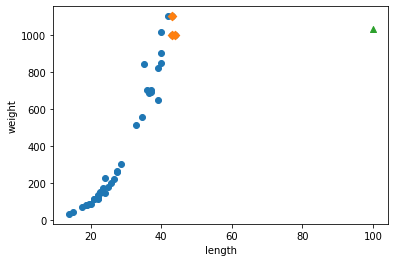

In [16]:
# length=100 인 농어의 weight 예측하기 
print(knr.predict([[100]]))
distances,indexes=knr.kneighbors([[100]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100,1033,marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

---  
## 선형회귀  

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# 모델 훈련
lr.fit(train_input,train_target)

# length=50 예측
lr.predict([[50]])

array([1241.83860323])

$\hat{y}=\hat{\alpha} x+\hat{\beta}$  
+ $\hat{y}$ : 적합값(fitted value)  
+ $\hat{\alpha}$ : 회귀모수 추정량 (계수) 
+ $\hat{\beta}$ : (절편)  
 

In [18]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


$\hat{y}=39.01x-709.02$  
선형 회귀 알고리즘이 찾은 최적의 직선  

> *참고*
> + *__모델기반학습__ : 모델 파라미터($\hat{\alpha},\hat{\beta}$)를 찾는 학습*
> + *__사례기반학습__ : 모델 파라미터 없고, 훈련세트를 저장하는 것이 훈련 자체*

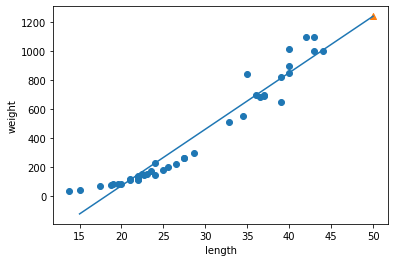

In [22]:
# train 데이터의 산점도
plt.scatter(train_input,train_target)

# length=15,50의 1차 방정식 그래프
x=[15,50]
prediction=lr.coef_*x+lr.intercept_

plt.plot(x,prediction)

# 50cm 농어의 데이터
plt.scatter(x[1],prediction[1],marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
# 결정계수
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


---  
## 다항회귀  

$y=\alpha_1x^2+\alpha_2x+\beta+e$  

In [31]:
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [32]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [37]:
# 새로운 모델 훈련시키기 
lr=LinearRegression()

lr.fit(train_poly,train_target)

# length=50 예측하기 
print(lr.predict([[50**2,50]]))

# 회귀계수
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


$\hat{y}=1.01x^2-21.56x+116.05$  

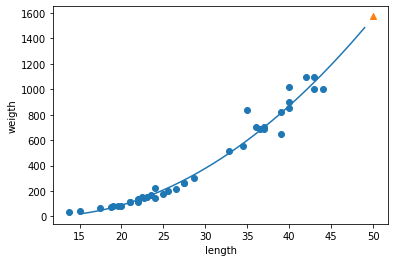

In [38]:
# train data 산점도
plt.scatter(train_input,train_target)

# [15,50)의 2차 방정식 그래프
points=np.arange(15,50) # [15,50)
prediction=1.01*points**2-21.56*points+116.05
plt.plot(points,prediction)

# length=50 
plt.scatter(50,lr.predict([[50**2,50]]),marker='^')

plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

In [40]:
# 평가하기
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


과소적합  